# ベクトル・行列計算

## ベクトル

In [1]:
a = [1, 2, 3]
2 * a

3-element Vector{Int64}:
 2
 4
 6

In [2]:
b = [4, 5, 6]
a + b

3-element Vector{Int64}:
 5
 7
 9

In [3]:
a * b # 無理

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/matmul.jl:44
[0m  *(::StridedVecOrMat{T} where T, [91m::LinearAlgebra.Adjoint{var"#s814", var"#s813"} where {var"#s814", var"#s813"<:LinearAlgebra.LQPackedQ}[39m) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/lq.jl:254
[0m  ...

In [4]:
a .* b # 要素ごと

3-element Vector{Int64}:
  4
 10
 18

In [5]:
a' * b # '->転置、通常の行列積 (1, 3)x(3, 1)

32

In [6]:
a * b'

3×3 Matrix{Int64}:
  4   5   6
  8  10  12
 12  15  18

In [7]:
sum(a .* b)

32

In [8]:
A = [1 2 3;
         4 5 6]
B = [10 20 30;
         40 50 60]

A + B

2×3 Matrix{Int64}:
 11  22  33
 44  55  66

In [9]:
A' * B

3×3 Matrix{Int64}:
 170  220  270
 220  290  360
 270  360  450

In [11]:
# loop版
M = size(A, 1)
N = size(B, 2)

C = [sum(A'[i, :] .* B[:, j]) for i in 1:M, j in 1:N]

2×3 Matrix{Int64}:
 170  220  270
 220  290  360

In [12]:
A * B # DimensionMismatch

LoadError: DimensionMismatch("matrix A has dimensions (2,3), matrix B has dimensions (2,3)")

In [13]:
a = [1, 2, 3]
b = [5, 7]
a * b'

3×2 Matrix{Int64}:
  5   7
 10  14
 15  21

In [14]:
f2(x, y) = 2*x + y
f2.(a, b') # 各要素の組み合わせを与えた場合の関数値を列挙可能

3×2 Matrix{Int64}:
  7   9
  9  11
 11  13

In [15]:
A = [1 2;
         3 4]
B = inv(A)

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [16]:
A * B

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

In [17]:
B * A

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [18]:
println(B)

[-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]


In [19]:
# 数値誤差回避方法、rational型：有理数
A = Rational{Int}[1 2;
                              3 4]
B = inv(A)
println(A * B)
println(B * A)

Rational{Int64}[1//1 0//1; 0//1 1//1]
Rational{Int64}[1//1 0//1; 0//1 1//1]


## 統計量の計算

In [20]:
using Statistics

In [21]:
X = rand(5)

5-element Vector{Float64}:
 0.48066642887442135
 0.11385139707975589
 0.17688459395354972
 0.9973277153216538
 0.18078364147535364

In [22]:
Y = rand(2, 5)

2×5 Matrix{Float64}:
 0.681607  0.730838  0.883941  0.431269  0.571045
 0.817781  0.49872   0.281921  0.953636  0.889525

In [26]:
println(sum(X))
println(mean(X))

1.9495137767047344
0.38990275534094687


In [27]:
println(sum(Y))
println(sum(Y, dims=1))
println(sum(Y, dims=2))
println(mean(Y))
println(mean(Y, dims=1))
println(mean(Y, dims=2))

6.740281701177591
[1.4993875804978714 1.2295583925233802 1.1658616419370393 1.3849049186344031 1.4605691675848975]
[3.298699490622102; 3.441582210555489]
0.6740281701177591
[0.7496937902489357 0.6147791962616901 0.5829308209685197 0.6924524593172016 0.7302845837924488]
[0.6597398981244205; 0.6883164421110978]


In [28]:
println(std(X))
println(std(X) .^2)
println(var(X))

0.3682780945506741
0.13562875492587526
0.13562875492587526


$y_n$:D次元ベクトル 　
$Y = \{ y_1, ..., y_N\}$  
$i$次元目と$j$次元目の共分散  
$Cov_{i, j} = \frac{1}{N-1}\sum_{n=1}^{N}(x_{n, i}-\mu_j)(x_{n, j}-\mu_j)$

In [29]:
cov(Y)

5×5 Matrix{Float64}:
  0.00927173  -0.0158043  -0.0409899   0.0355665   0.0216844
 -0.0158043    0.0269395   0.06987    -0.0606256  -0.0369625
 -0.0409899    0.06987     0.181214   -0.157238   -0.0958657
  0.0355665   -0.0606256  -0.157238    0.136434    0.0831818
  0.0216844   -0.0369625  -0.0958657   0.0831818   0.0507147

In [30]:
cov(Y, dims=1)

5×5 Matrix{Float64}:
  0.00927173  -0.0158043  -0.0409899   0.0355665   0.0216844
 -0.0158043    0.0269395   0.06987    -0.0606256  -0.0369625
 -0.0409899    0.06987     0.181214   -0.157238   -0.0958657
  0.0355665   -0.0606256  -0.157238    0.136434    0.0831818
  0.0216844   -0.0369625  -0.0958657   0.0831818   0.0507147

In [31]:
cov(Y, dims=2)

2×2 Matrix{Float64}:
  0.0289663  -0.0450569
 -0.0450569   0.0821862

## 統計量と確率分布のパラメータ

In [32]:
using Distributions

In [33]:
μ = 1.5
σ = 2.0
Z = rand(Normal(μ, σ), 10000)
Z

10000-element Vector{Float64}:
  2.9022946266103395
  1.6711944228006879
  2.86477256886383
 -0.3695331190422264
  0.8488190233233446
 -2.797257382379284
  4.813615104537497
  1.2295535221247063
  0.1975179456777605
 -0.3628854058839073
  1.5367174558086136
  4.044106968315263
 -0.6591408274235548
  ⋮
  2.6195008397829307
  2.0928754535030487
 -0.43854086210531373
  0.8843567977479111
 -0.017327741115646722
 -1.8232487511503694
  1.8661077455790036
 -0.12238347070724442
  2.4026674365690788
  1.538431313546442
 -0.927547169774289
  2.906080244579086

In [35]:
println(mean(Z))
println(std(Z))

1.4746798157950325
2.0005672985703518


## 微分計算

### 1変数関数

In [36]:
using PyPlot

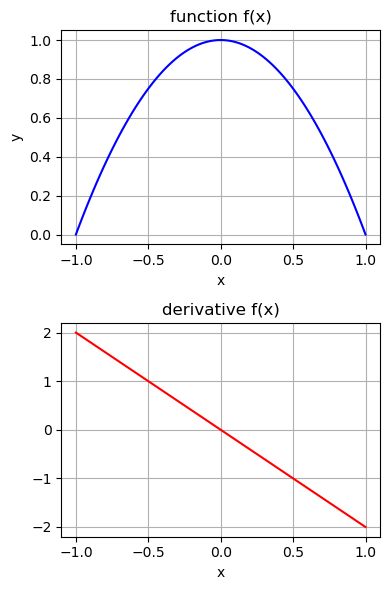

In [38]:
f(x) = -(x + 1)*(x - 1)

h = 1.0e-10

f′(x) = (f(x+h) - f(x))/h

xs = range(-1, 1, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[1].set_ylabel("y")
axes[2].set_title("derivative f(x)")

tight_layout()

### 2変数関数

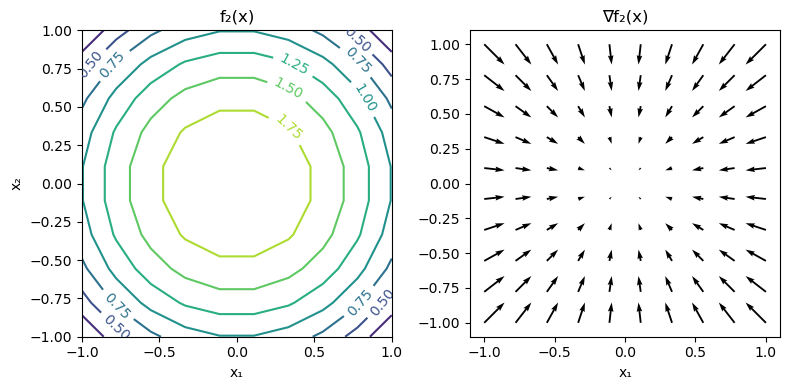

In [39]:
L = 10

xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)

f₂(x) = -(x .+ 1)' * (x .- 1)

∇f₂(x) = -2x

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs, inline=true)
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].set_title("f₂(x)")

vec1 = [∇f₂([x₁, x₂])[1] for x₁ in xs₁, x₂ in xs₂]
vec2 = [∇f₂([x₁, x₂])[2] for x₁ in xs₁, x₂ in xs₂]
axes[2].quiver(repeat(xs₁, 1, L), repeat(xs₂', L, 1), vec1, vec2)
axes[2].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[2].set_title("∇f₂(x)")

tight_layout()

In [40]:
repeat(xs₁, 1, L)

10×10 Matrix{Float64}:
 -1.0       -1.0       -1.0       …  -1.0       -1.0       -1.0
 -0.777778  -0.777778  -0.777778     -0.777778  -0.777778  -0.777778
 -0.555556  -0.555556  -0.555556     -0.555556  -0.555556  -0.555556
 -0.333333  -0.333333  -0.333333     -0.333333  -0.333333  -0.333333
 -0.111111  -0.111111  -0.111111     -0.111111  -0.111111  -0.111111
  0.111111   0.111111   0.111111  …   0.111111   0.111111   0.111111
  0.333333   0.333333   0.333333      0.333333   0.333333   0.333333
  0.555556   0.555556   0.555556      0.555556   0.555556   0.555556
  0.777778   0.777778   0.777778      0.777778   0.777778   0.777778
  1.0        1.0        1.0           1.0        1.0        1.0

In [45]:
repeat(xs₂', L, 1)

10×10 Matrix{Float64}:
 -1.0  -0.777778  -0.555556  -0.333333  …  0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333  …  0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0
 -1.0  -0.777778  -0.555556  -0.333333     0.333333  0.555556  0.777778  1.0

In [41]:
vec1

10×10 Matrix{Float64}:
  2.0        2.0        2.0       …   2.0        2.0        2.0
  1.55556    1.55556    1.55556       1.55556    1.55556    1.55556
  1.11111    1.11111    1.11111       1.11111    1.11111    1.11111
  0.666667   0.666667   0.666667      0.666667   0.666667   0.666667
  0.222222   0.222222   0.222222      0.222222   0.222222   0.222222
 -0.222222  -0.222222  -0.222222  …  -0.222222  -0.222222  -0.222222
 -0.666667  -0.666667  -0.666667     -0.666667  -0.666667  -0.666667
 -1.11111   -1.11111   -1.11111      -1.11111   -1.11111   -1.11111
 -1.55556   -1.55556   -1.55556      -1.55556   -1.55556   -1.55556
 -2.0       -2.0       -2.0          -2.0       -2.0       -2.0

### 自動微分

In [46]:
using ForwardDiff

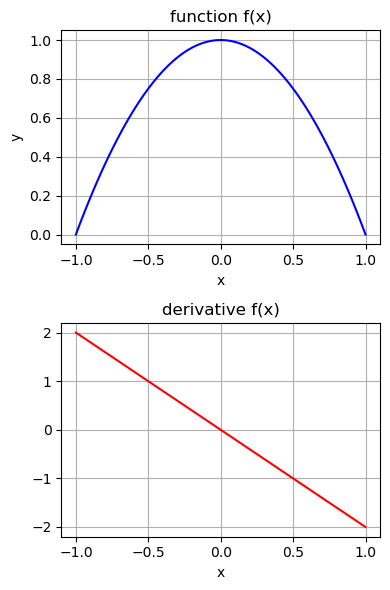

In [48]:
f(x) = -(x + 1)*(x - 1)

f′(x) = ForwardDiff.derivative(f, x)

xs = range(-1, 1, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[1].set_ylabel("y")
axes[2].set_title("derivative f(x)")

tight_layout()

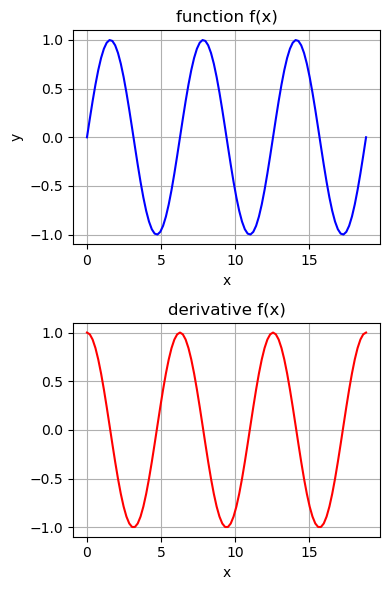

In [50]:
f(x) = sin.(x)

f′(x) = ForwardDiff.derivative(f, x)

xs = range(0, 2pi*3, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[1].set_ylabel("y")
axes[2].set_title("derivative f(x)")

tight_layout()

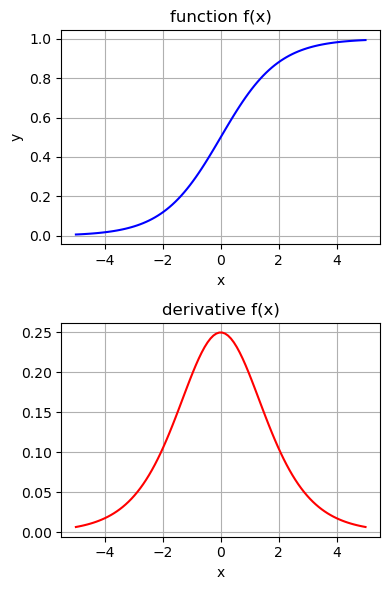

In [51]:
f(x) = 1/(1 + exp(-x))

f′(x) = ForwardDiff.derivative(f, x)

xs = range(-5, 5, length=100)

fig, axes = subplots(2, 1, figsize=(4, 6))

axes[1].plot(xs, f.(xs), "b")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("function f(x)")

axes[2].plot(xs, f′.(xs), "r")
axes[2].grid()
axes[2].set_xlabel("x"), axes[1].set_ylabel("y")
axes[2].set_title("derivative f(x)")

tight_layout()

## 関数の最適化

### 1変数関数の勾配法

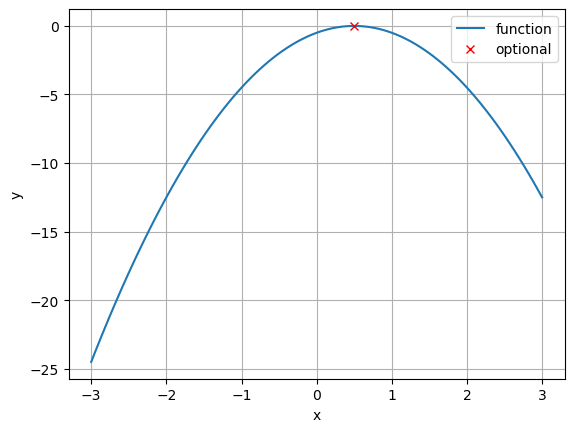

PyObject <matplotlib.legend.Legend object at 0x7f82158c5190>

In [52]:
x_opt = 0.50
f(x) = -2(x - x_opt)^2

fig, ax = subplots()

xs = range(-3, 3, length=100)
ax.plot(xs, f.(xs), label="function")
ax.plot(x_opt, f(x_opt), "rx", label="optional")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [57]:
function gradient_method_1dim(f, x_init, η, maxiter)
    x_seq = Array{typeof(x_init), 1}(undef, maxiter)
    
    f′(x) = ForwardDiff.derivative(f, x)
    
    x_seq[1] = x_init
    
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η*f′(x_seq[i-1])
    end
    
    return x_seq
end

gradient_method_1dim (generic function with 1 method)

In [58]:
x_init = -2.5

maxiter = 20

η = 0.1

x_seq = gradient_method_1dim(f, x_init, η, maxiter)
f_seq = f.(x_seq)

20-element Vector{Float64}:
 -18.0
  -6.479999999999999
  -2.3327999999999993
  -0.8398079999999998
  -0.30233087999999986
  -0.10883911679999994
  -0.03918208204799999
  -0.014105549537279988
  -0.0050779978334207915
  -0.0018280792200314835
  -0.0006581085192113332
  -0.0002369190669160795
  -8.529086408978862e-5
  -3.07047110723239e-5
  -1.1053695986036396e-5
  -3.979330554973165e-6
  -1.4325589997903394e-6
  -5.157212399245448e-7
  -1.8565964637284966e-7
  -6.683747269421776e-8

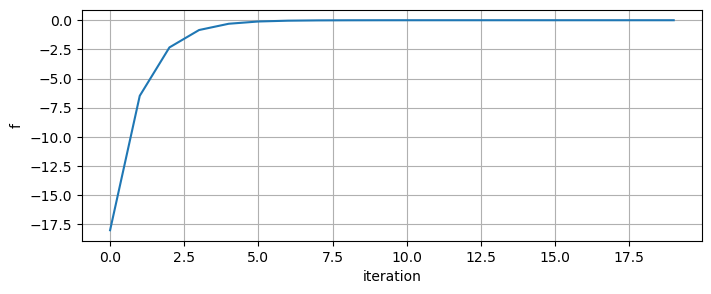

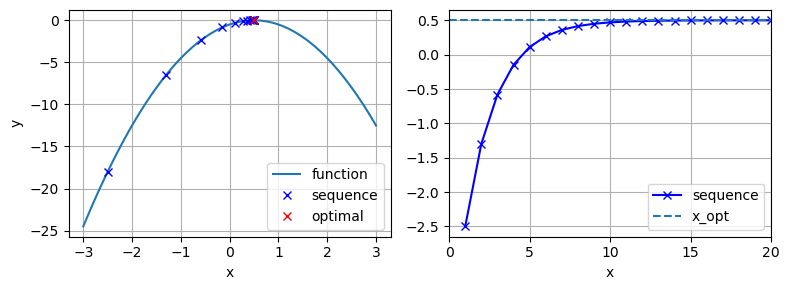

In [59]:
fig, ax = subplots(figsize=(8, 3))

ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()
    
fig, axes = subplots(1, 2, figsize=(8, 3))

axes[1].plot(xs, f.(xs), label="function")
axes[1].plot(x_seq, f.(x_seq), "bx", label="sequence")
axes[1].plot(x_opt, f(x_opt), "rx", label="optimal")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].legend()

axes[2].plot(1:maxiter, x_seq, "bx-", label="sequence")
axes[2].hlines(x_opt, 0, maxiter, ls="--", label="x_opt")
axes[2].set_xlim([0, maxiter])
axes[2].grid()
axes[2].set_xlabel("x"), axes[1].set_ylabel("y")
axes[2].legend()

tight_layout()

### 多変数関数の勾配法

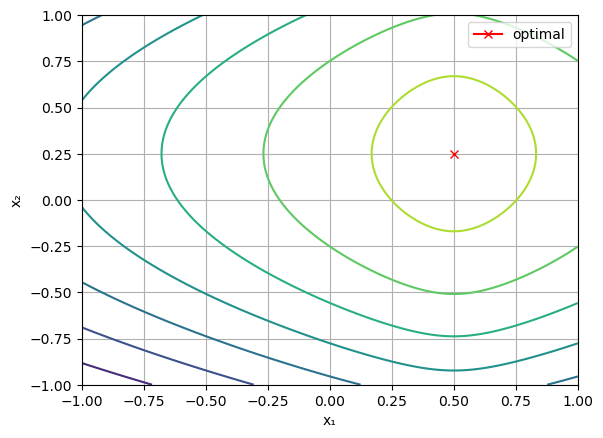

PyObject <matplotlib.legend.Legend object at 0x7f82155ee610>

In [60]:
x_opt = [0.50, 0.25]
f₂(x) = -sqrt(0.05 + (x[1] - x_opt[1])^2) - (x[2] - x_opt[2])^2

L = 100
xs₁ = range(-1, 1, length=L)
xs₂ = range(-1, 1, length=L)
fig, ax = subplots()
ax.contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
ax.plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
ax.set_xlabel("x₁"), ax.set_ylabel("x₂")
ax.grid()
ax.legend()

In [61]:
function gradient_method(f, x_init, η, maxiter)
    x_seq = Array{typeof(x_init[1]), 2}(undef, length(x_init), maxiter)
    
    ∇f(x) = ForwardDiff.gradient(f, x)
    
    x_seq[:, 1] = x_init
    
    for i in 2:maxiter
        x_seq[:, i] = x_seq[:, i-1] + η*∇f(x_seq[:, i-1])
    end
    x_seq
end

gradient_method (generic function with 1 method)

In [62]:
x_init = [-0.75, -0.75]
maxiter = 20
η = 0.1

x_seq = gradient_method(f₂, x_init, η, maxiter)
f_seq = [f₂(x_seq[:, i]) for i in 1:maxiter]

20-element Vector{Float64}:
 -2.2698425099200294
 -1.8130713587869223
 -1.4864674129221398
 -1.2435333058718216
 -1.0546304357566991
 -0.9009647514196972
 -0.7707699828580662
 -0.6569195690940037
 -0.5554903555124693
 -0.46498971917861137
 -0.3860446444970153
 -0.3212180328272999
 -0.27400717006417613
 -0.2457105046976077
 -0.23231600743801767
 -0.22703677774417294
 -0.22508176283129977
 -0.22432371767829845
 -0.2239955619536749
 -0.2238341324318122

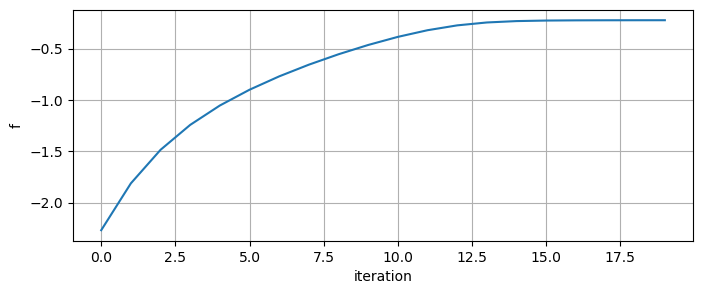

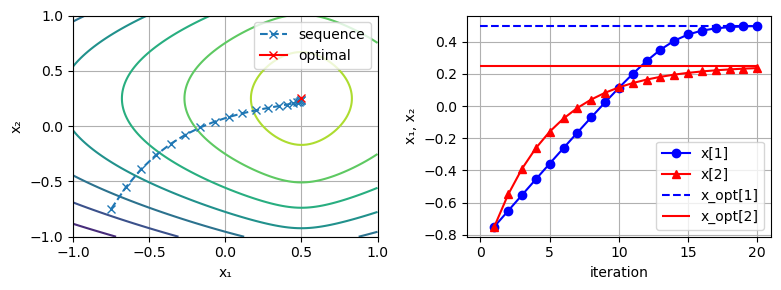

In [80]:
fig, ax = subplots(figsize=(8, 3))

ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()
    
fig, axes = subplots(1, 2, figsize=(8, 3))

axes[1].contour(xs₁, xs₂, [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].plot(x_seq[1, :], x_seq[2, :], ls="--", marker="x", label="sequence")
axes[1].plot(x_opt[1], x_opt[2], color="r", marker="x", label="optimal")
axes[1].grid()
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")
axes[1].legend()

axes[2].plot(1:maxiter, x_seq[1, :], color="b", marker="o", label="x[1]")
axes[2].plot(1:maxiter, x_seq[2, :], color="r", marker="^", label="x[2]")
axes[2].hlines(x_opt[1], 0, maxiter, color="b", ls="--", label="x_opt[1]")
axes[2].hlines(x_opt[2], 0, maxiter, color="r", ls="-", label="x_opt[2]")
# axes[2].set_xlim([0, maxiter])
axes[2].grid()
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("x₁, x₂")
axes[2].legend()

tight_layout()

### 局所最適解と大域最適解

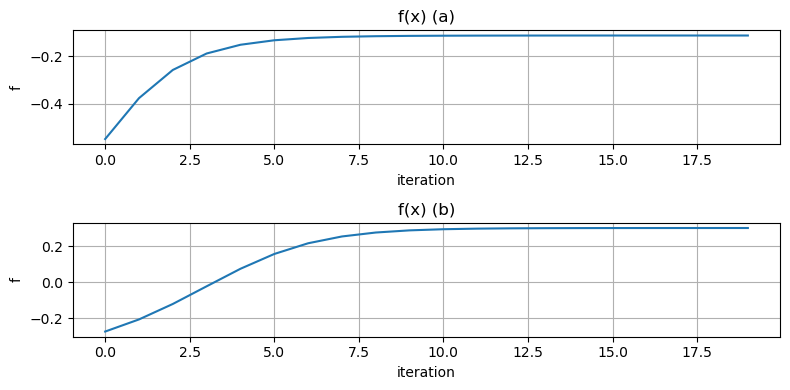

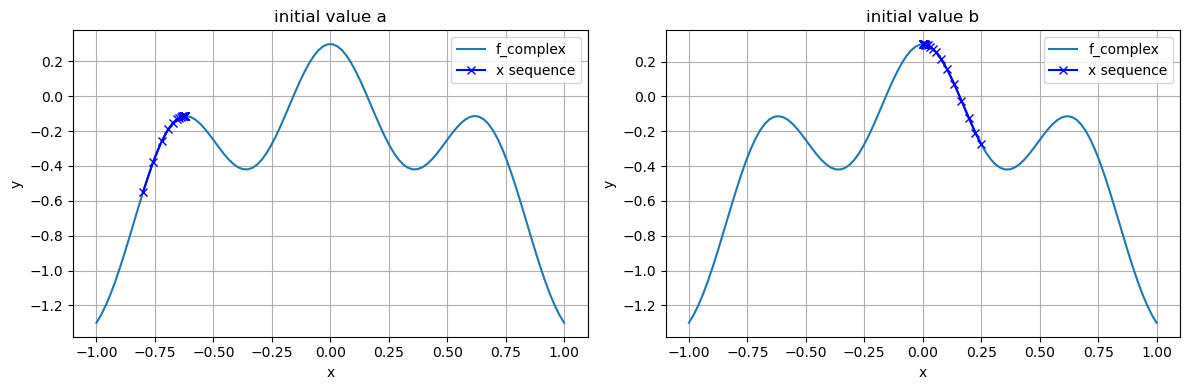

In [84]:
f_complex(x) = 0.3*cos(3pi*x) - x^2

maxiter = 20
η = 0.01

x_init_a = -0.8
x_seq_a = gradient_method_1dim(f_complex, x_init_a, η, maxiter)
f_seq_a = f_complex.(x_seq_a)

x_init_b = 0.25
x_seq_b = gradient_method_1dim(f_complex, x_init_b, η, maxiter)
f_seq_b = f_complex.(x_seq_b)

fig, axes = subplots(2, 1, figsize=(8, 4))

axes[1].plot(f_seq_a)
axes[1].set_xlabel("iteration"), axes[1].set_ylabel("f")
axes[1].set_title("f(x) (a)")
axes[1].grid()
axes[2].plot(f_seq_b)
axes[2].set_xlabel("iteration"), axes[2].set_ylabel("f")
axes[2].set_title("f(x) (b)")
axes[2].grid()
tight_layout()

xs = range(-1, 1, length=100)

fig, axes = subplots(1, 2, figsize=(12, 4))

axes[1].plot(xs, f_complex.(xs), ls="-", label="f_complex")
axes[1].plot(x_seq_a, f_complex.(x_seq_a), color="b", marker="x", label="x sequence")
axes[1].grid()
axes[1].set_xlabel("x"), axes[1].set_ylabel("y")
axes[1].set_title("initial value a")
axes[1].legend()

axes[2].plot(xs, f_complex.(xs), label="f_complex")
axes[2].plot(x_seq_b, f_complex.(x_seq_b), color="b", marker="x", label="x sequence")
axes[2].grid()
axes[2].set_xlabel("x"), axes[2].set_ylabel("y")
axes[2].set_title("initial value b")
axes[2].legend()

tight_layout()

## 最適化によるカーブフィッティング

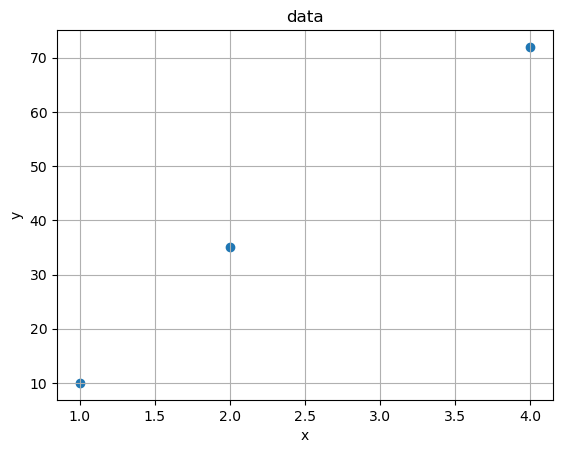

In [85]:
x_obs = [1, 2, 4]
y_obs = [10, 35, 72]

fig, ax = subplots()
ax.scatter(x_obs, y_obs)
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.set_title("data")
ax.grid()

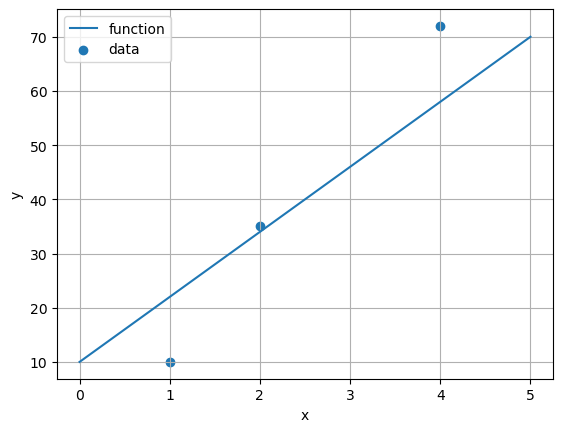

PyObject <matplotlib.legend.Legend object at 0x7f8215c65820>

In [87]:
w = [12.0, 10.0]

f(x) = w[1]*x + w[2]

xs = range(0, 5, length=100)

fig, ax = subplots()
ax.plot(xs, f.(xs), label="function")
ax.scatter(x_obs, y_obs, label="data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [91]:
E(w) = sum([(y_obs[n] - (w[1]*x_obs[n] + w[2]))^2 for n in 1:length(x_obs)])

E (generic function with 1 method)

In [92]:
w_init = [0.0, 0.0]

maxiter = 500

η = 0.01

F(w) = -E(w)
w_seq = gradient_method(F, w_init, η, maxiter)
f_seq = [F(w_seq[:, i]) for i in 1:maxiter]

500-element Vector{Float64}:
 -6509.0
 -1939.5819999999997
  -644.3813987199998
  -275.7910161687038
  -169.46811483893487
  -137.41138630873562
  -126.41782512660872
  -121.4305759666068
  -118.18766202638302
  -115.48193910495918
  -112.97076516030776
  -110.556165388921
  -108.20942661889302
     ⋮
   -12.072442904302092
   -12.072418776699926
   -12.072395223013139
   -12.072372229590176
   -12.072349783104178
   -12.072327870545308
   -12.072306479213296
   -12.072285596709893
   -12.072265210931684
   -12.072245310063245
   -12.072225882570269
   -12.072206917192597

In [93]:
w₁, w₂ = w_seq[:, end]
println("w_1 = $(w₁), w_2 = $(w₂)")

w_1 = 20.345436819385633, w_2 = -8.465882327774901


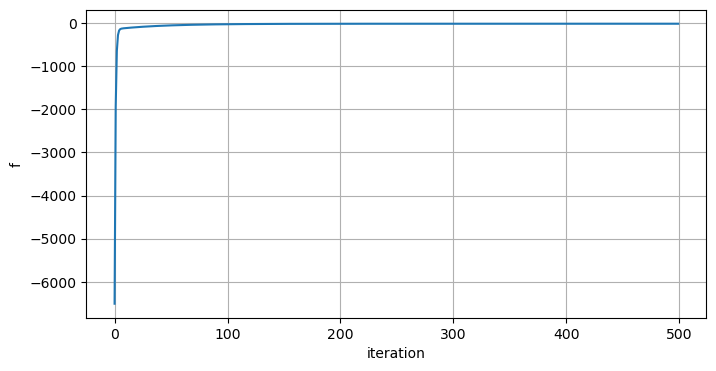

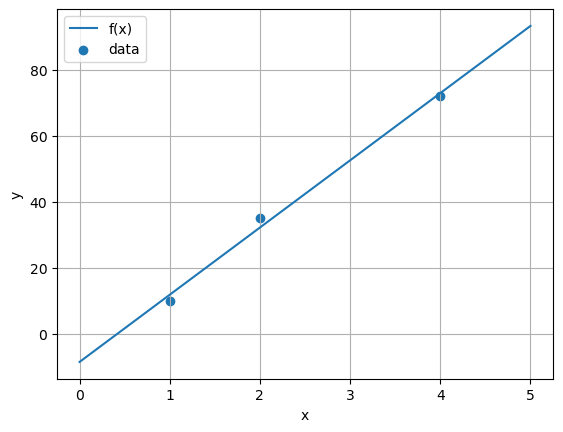

PyObject <matplotlib.legend.Legend object at 0x7f8215c86100>

In [95]:
fig, ax = subplots(figsize=(8, 4))
ax.plot(f_seq)
ax.set_xlabel("iteration"), ax.set_ylabel("f")
ax.grid()

f(x) = w₁*x + w₂

xs = range(0, 5, length=100)

fig, ax = subplots()
ax.plot(xs, f.(xs), label="f(x)")
ax.scatter(x_obs, y_obs, label="data")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()
ax.legend()

In [96]:
function linear_fit(y, x)
    N = length(y)
    w₁ = sum((y .- mean(y)) .* x) / sum((x .- mean(x)) .* x)
    w₂ = mean(y) - w₁*mean(x)
    w₁, w₂
end

w₁, w₂ = linear_fit(y_obs, x_obs)
println("w_1 = $(w₁), w_2 = $(w₂)")

w_1 = 20.35714285714286, w_2 = -8.500000000000014


## 積分計算

### 1変数関数の数値積分

$\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}$

In [97]:
function approx_integration(x_range, f)
    Δ = x_range[2] - x_range[1]
    
    sum([f(x)*Δ for x in x_range]), Δ
end

approx_integration (generic function with 1 method)

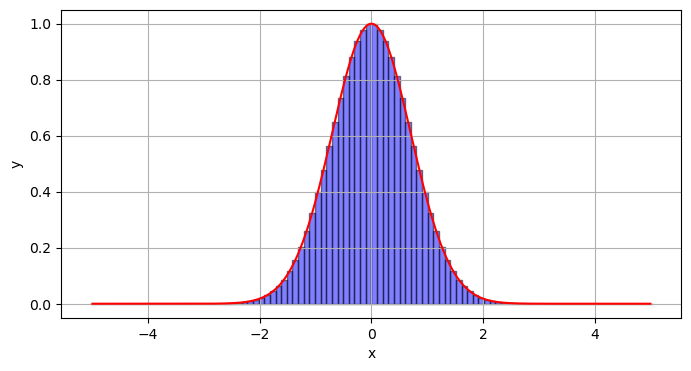

approx = 1.7724538509039651
exact = 1.7724538509055159


In [103]:
f(x) = exp(-x^2)

x_range = range(-5, 5, length=100)

approx, Δ = approx_integration(x_range, f)

println("approx = $(approx)")
println("exact = $(sqrt(pi))")

fig, ax = subplots(figsize=(8, 4))
xs = range(-5, 5, length=1000)
ax.plot(xs, f.(xs), "r-")
for x in x_range
    ax.fill_between([x - Δ/2, x + Δ/2], [f(x), f(x)], [0, 0], facecolor="b", edgecolor="k", alpha=0.5)
end
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.grid()

### 多変数関数の数値積分

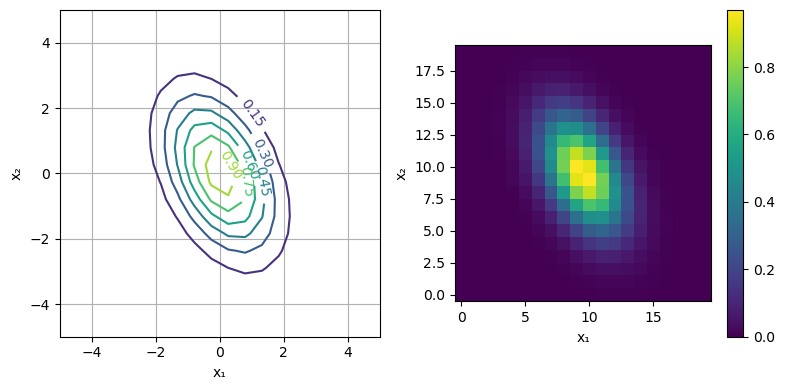

In [106]:
D = 2
A = [0.5 0.3
         0.3 1.0]
f₂(x) = exp(-0.5*x'*A*x)

L = 20
xs₁ = range(-5, 5, length=L)
xs₂ = range(-5, 5, length=L)

fig, axes = subplots(1, 2, figsize=(8, 4))

cs = axes[1].contour(repeat(xs₁, 1, L), repeat(xs₂', L, 1), [f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂]')
axes[1].clabel(cs)
axes[1].grid()
axes[1].set_xlabel("x₁"), axes[1].set_ylabel("x₂")

cs = axes[2].imshow([f₂([x₁, x₂]) for x₁ in xs₁, x₂ in xs₂], origin="lower")
fig.colorbar(cs)
axes[2].set_xlabel("x₁"), axes[2].set_ylabel("x₂")

tight_layout()

In [109]:
function approx_integration_2dim(x_range, f)
    Δ = x_range[2] - x_range[1]
    
    sum([f([x₁, x₂])*Δ^2 for x₁ in x_range, x₂ in x_range]), Δ
end

approx_integration_2dim (generic function with 1 method)

In [110]:
using LinearAlgebra

L = 20
x_range = range(-5, 5, length=L)
approx, Δ = approx_integration_2dim(x_range, f₂)

println("approx = $(approx)")
println("exact = $(sqrt((2*pi)^D/det(A)))")

approx = 9.805714174433017
exact = 9.812686860654528


In [112]:
L = 1000
x_range = range(-100, 100, length=L)
approx, Δ = approx_integration_2dim(x_range, f₂)

println("approx = $(approx)")
println("exact = $(sqrt((2*pi)^D/det(A)))")

approx = 9.812686860654521
exact = 9.812686860654528
